# Cutoff for the solar atmosphere using the VALIIIc Model

##Background - the problem


The cutoff frequency for the slow magnetoacoustic wave is derived in *Roberts (2006)* from equation (3.11) which is given below:

$$\frac{\partial^2 Q}{\partial t^2} - c_t^2(z) \frac{\partial^2 Q}{\partial z^2} + \Omega^2(z)Q = 0 \qquad\text{(1)}$$

which by fourier analysing in time gives the following equation:

$$\frac{d^2 Q(z)}{d t^2} + \left( \frac{\omega^2 - \Omega^2(z)}{c_t^2(z)} \right)Q(z) = 0 \qquad\text{(2)}$$
	

Compute the atmospheric cut-off frequenccy (From Roberts 2004)

$$ \omega_{c}=\frac{\gamma g}{4\pi c_{s}}\sqrt{1+2\frac{d}{dz}\frac{P}{\rho g}}$$

The atmospheric scale parameter 

Read VAL IIc data from csv file

column 1 height [m]
Column 2 Temperature [K]
Column 3 Density [kg/m^3]
Column 4 Pressure [Pa]


(2048L, 4L)
[ 6.20960377  6.20920411  6.20880509 ...,  3.76641285  3.76641285
  3.76641285]


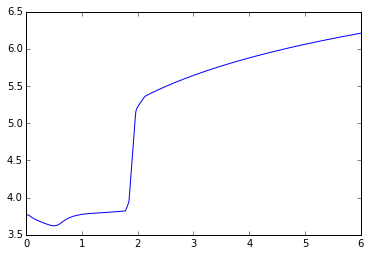

In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import math



%matplotlib inline 
data=numpy.loadtxt(fname='..\\data\\atmos.csv', delimiter=',')
#print data
print data.shape
#print data[1:10,2]
height=data[0:2048,0]
ltemp=numpy.log10(data[0:2048,1]) #notation to avoid http://stackoverflow.com/questions/21687581/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-trying

print ltemp
plt.plot(height/1.0e6,ltemp)

## Function to compute the speed of sound

8192
2048
2048


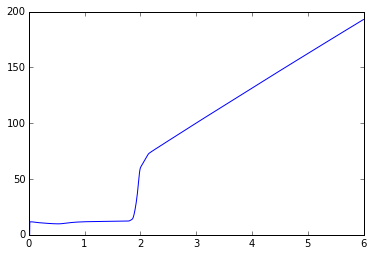

In [2]:
from math import exp, sqrt, pi

class vars:
  
    mu=0.6e0
    R=8.31e3
    fgamma=1.66666667e0
    ggg=-274.0e0
    mu=4*pi/1.0e7
    

def cs(var, p, rho):
    vcs=sqrt(vars.fgamma*p/rho)
    return vcs

ptemp=numpy.float64(data[1:2048,3])
rhotemp=numpy.float64(data[1:2048,2])

#ptemp=numpy.float64(301.2741)

asize=data.size
print asize
acs = numpy.zeros(asize/4)
acs2 = numpy.zeros(asize/4)
for i in range(0,(asize/4)-3):
    #acs[i]=cs(vars,ptemp[i],rhotemp[i]);
    count=1
    ptot=ptemp[i]
    rhottot=rhotemp[i]
    for j in range(i+1,i+10):        
        if j<=(asize/4)-4:
            ptot=ptot+ptemp[j]
            rhottot=rhottot+rhotemp[j]
            count=count+1
    ptemp[i]=ptot/count
    rhotemp[i]=rhottot/count
    #print i,count,ptemp[i],rhotemp[i]
    acs[i]=cs(vars,ptemp[i],rhotemp[i]);
    acs2[i]=acs[i]*acs[i]
    
print acs.size
print height.size
plt.plot(height/1.0e6,acs/1000)
#ptemp=numpy.float64(data[1:2048,3])

##Functions to compute sound speed analog and gradient from best fits


$$ \frac{d}{dz}\frac{P}{\rho g}$$

## Function to compute the atmospheric scale parameter

8192
451.844630126
451.785009759
463.289024792
461.810860883
461.81978844
463.306622666
451.86098918
451.803459086
463.285167961
461.810154527
463.29362252
451.866652173
451.809401948
463.271829426
461.798443765
461.806760887
463.286865728
451.881973942
451.824520714
463.260252756
461.792847537
463.270705647
451.884514308
451.826775968
463.246980466
461.777930716
461.785634533
463.259573169
451.89517199
451.837164457
463.234780895
461.76892222
463.240064285
451.894597411
451.835860324
463.213982623
461.750381796
461.756795874
463.224463295
451.901897756
451.842892095
463.197315142
461.736384139
463.20171862
451.898125626
451.838384947
463.173208175
461.714547896
461.72075083
461.72696115
461.73201502
461.736999876
461.743081088
461.748417909
463.207034661
451.943848238
451.884047043
463.177572705
461.723226444
463.178457785
451.934461191
451.875014121
463.148107508
461.692816773
461.700821079
461.705469011
461.710052021
461.714570108
461.719023273
461.723411514
461.727734833
461.731993

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:94: RuntimeWarning: divide by zero encountered in divide


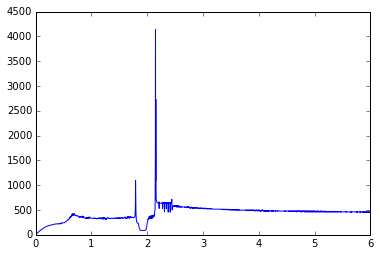

In [8]:
from math import exp, sqrt, pi


def omegai(vars, omega0, pres, rho, dc2dz):
    cst=cs(vars,pres,rho)
    omi=omega0*omegao-(vars.ggg*vars.fgamma/(2*cst*cst))*dc2dz
    return omi


def lambda0(vars, P,rho):
    vlam0=-P/(rho*vars.ggg)
    return vlam0

def lagrange_interp(xval,f,x,i): 
    t1=(xval-x[i])*(xval-x[i+1])/((x[i-1]-x[i])*(x[i-1]-x[i+1]))
    t2=(xval-x[i-1])*(xval-x[i+1])/((x[i]-x[i-1])*(x[i]-x[i+1]))
    t3=(xval-x[i-1])*(xval-x[i])/((x[i+1]-x[i-1])*(x[i+1]-x[i]))
    y=t1*f[i-1]+t2*f[i]+t3*f[i+1]
    return y

def diff5p(y,i,h):
    diff=(y[i-2]-8*y[i-1]+8*y[i+1]-y[i+2])/(12*h)
    return diff

def diff3p(y,i,h):
    diff=(y[i+1]-y[i-1])/(2*h)    
    return diff

#compute lambda0
alam0 = numpy.zeros(asize/4)
alami0 = numpy.zeros(asize/4)
omkne=numpy.zeros(asize/4)
omc2=numpy.zeros(asize/4)
dc2dz=numpy.zeros(asize/4)
print asize
for i in range(1,(asize/4)-1):
    alam0[i]=lambda0(vars,ptemp[i],rhotemp[i])

dh=height[0]-height[1]    
for i in range(1,(asize/4)-2):
    xval=height[0]-i*dh
    alami0[i]=lagrange_interp(xval,alam0,height,i)    
    
    
#print alam0  
#compute cutoff
atc0 = numpy.zeros(asize/4)
lamdash0 = numpy.zeros(asize/4)
for i in range(2,(asize/4)-4):
    h=height[i]-height[i+1]
    #lamdash0[i]=diff3p(alam0,i,h)
    #lamdash0[i]=ptemp[i]/rhotemp[i]
    lamdash0[i]=diff5p(alami0,i,h)
    #if lamdash0[i]<-200:
    #    lamdash0[i]=-200
    count=1
    lamtot=0
    csitot=0
    for j in range(i,i+100):
        if j<=(asize/4)-100:
            csitot=csitot+acs[j]
            lamtot=lamtot+lamdash0[j]
            count=count+1
    lamtot=lamtot/count
    
    lamdash0[i]=diff5p(alami0,i,h)
    dc2dz[i]=diff5p(acs2,i,h)
    omc2[i]=(math.pow(vars.ggg*vars.fgamma/2,2)/acs2[i])-dc2dz[i]*(vars.ggg*vars.fgamma/2)/acs2[i]
    ha=height[i]
    
    #using knesers theorem to determine cut off
    omkne[i]=math.sqrt(math.fabs(omc2[i]+acs2[i]/(4*ha*ha)))
    #lamdash0[i]=lamtot   

for i in range(2,(asize/4)-15):
    h=height[i]-height[i+1]
    #lamdash0[i]=diff3p(alam0,i,h)
    #lamdash0[i]=ptemp[i]/rhotemp[i]
    #lamdash0[i]=diff5p(alami0,i,h)
    #if lamdash0[i]<-200:
    #    lamdash0[i]=-200
    #print h,alam0[i],lamdash0[i]
    #print h,ptemp[i],rhotemp[i],lamdash0[i]
    #atc0[i]=1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i]))*math.sqrt(1+2*lamdash0[i]))
    #atc0[i]=-1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i])))*math.sqrt(1+2*dp_over_rhog(vars, height[i]))
    #atc0[i]=math.sqrt(-1.0/((vars.fgamma*vars.ggg/(2*acs[i]*acs[i])))*(1-vars.fgamma*vars.ggg*dp_over_rhog(vars, height[i])))
    #atc0[i]=math.sqrt(-1.0/((vars.fgamma*vars.ggg/(2*acs[i]*acs[i]))))
    #print i,height[i]/1.0e6,atc0[i]
    #lamdash0[i]=0
    atc0[i]=-1.0/((vars.fgamma*vars.ggg/(4*pi*acs[i]))*math.sqrt(1-2*lamdash0[i]))
    print 2*pi/omc2i[i]

#plt.plot(height/1.0e6,atc0)
plt.plot(height/1.0e6,2*pi/omc2i)
#plt.plot(height/1.0e6,alam0)
#plt.plot(height/1.0e6,lamdash0)



##References
Malins
Direct Propagation of Photospheric Acoustic p Modes into Nonmagnetic Solar Atmosphere
http://adsabs.harvard.edu/abs/2007SoPh..246...41M

Fleck, B.; Schmitz, F.
The 3-min oscillations of the solar chromosphere - A basic physical effect?
http://adsabs.harvard.edu/abs/1991A%26A...250..235F

Vernazza, J. E.; Avrett, E. H.; Loeser, R.
Structure of the solar chromosphere. III - Models of the EUV brightness components of the quiet-sun
http://adsabs.harvard.edu/abs/1981ApJS...45..635V

Roberts, B.
MHD Waves in the Solar Atmosphere
http://adsabs.harvard.edu/abs/2004ESASP.547....1R